In [ ]:
# For Caltech ML homework1
# In this problem, you will create your own target function f and data set D to see how the Perceptron Learning Algorithm works.

# Take d = 2 so you can visualize the problem, and assume X = [−1,1]×[−1,1] with uniform probability of picking each x ∈X.

# In each run, choose a random line in the plane as your target function f 
# (do this by taking two random, uniformly distributed points in [−1,1]×[−1,1] 
# and taking the line passing through them), where one side of the line maps to +1 
# and the other maps to −1. Choose the inputs xn of the data set as random points (uniformly in X),
# and evaluate the target function on each xn to get the corresponding output yn.

# Now, in each run, use the Perceptron Learning Algorithm to ﬁnd g. 
# Start the PLA with the weight vector w being all zeros (consider sign(0) = 0, so all points are initially misclassiﬁed), 
# and at each iteration have the algorithm choose a point randomly from the set of misclassiﬁed points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
%matplotlib inline

In [53]:
# Choose a target function

# generate two points to get the target function
target_points = np.random.uniform(low=-1, high=1, size=(2, 2))
coefficients = np.polyfit([target_points[0][0], target_points[1][0]], [target_points[0][1], target_points[1][1]], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(-1, 1)
f_x = polynomial(x)

In [54]:
# Generate training sample

N = 100 # Sample size

# generate N uniformly distributed data points of dimention 2
data_points = np.random.uniform(low=-1, high=1, size=(N, 2))
y = np.sign([point[1] - polynomial(point[0]) for point in data_points])
df = pd.DataFrame(data=data_points, columns=['x1', 'x2'])
df['y'] = y

In [55]:
# PLA

# initial weight vector w
# so the initial hypothesis is sign(0) = 0
# all the data points are misclassified
w = [float(0), float(0), float(0)]

# record the w in every iteration
w_set = []

# indexes of misclassified points
iteration = 0
selected_misclassified = []

while iteration < 1000:
    # get misclassified points
    misclassified = []
    for index, row in df.iterrows():
        hypothesis = np.sign(w[0] + w[1] * row['x1'] + w[2] * row['x2'])
        
        if hypothesis == row['y']:
            pass
        else:
            misclassified.append(index)        
    # break if there is no misclassified point
    if not misclassified:
        break
        
    # select a misclassified point
    mis_index = misclassified[randint(0, len(misclassified) - 1)]
    mis_row = df.iloc[[mis_index]]
    selected_misclassified.append(mis_index)

    w[0] += mis_row.at[mis_index, 'y']
    w[1] += mis_row.at[mis_index, 'y'] * mis_row.at[mis_index, 'x1']
    w[2] += mis_row.at[mis_index, 'y'] * mis_row.at[mis_index, 'x2']
    
    w_set.append([w[0], w[1], w[2]])

    iteration += 1

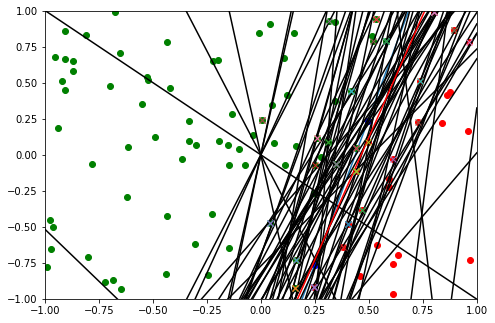

In [56]:
# Visualization

# visualization setup
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# plot target function
axes.plot(x, f_x)
axes.plot(target_points[0][0], target_points[0][1], target_points[1][0], target_points[1][1], marker='o', color='blue')

# plot sample
for index, row in df.iterrows():
    if row['y'] > 0:
        axes.plot(row['x1'], row['x2'], marker='o', color='green')
    elif row['y'] < 0:
        axes.plot(row['x1'], row['x2'], marker='o', color='red')
    else:
        axes.plot(row['x1'], row['x2'], marker='o', color='grey')

# plot all hypothesis functions
for ws in w_set:
    hypo_poly = np.poly1d([-ws[1] / ws[2], -ws[0] / ws[2]])
    hypo = hypo_poly(x)
    if ws == w_set[-1]:
        axes.plot(x, hypo, color='red')
    else:
        axes.plot(x, hypo, color='black')

for index in selected_misclassified:
    axes.plot(df.at[index, 'x1'], df.at[index, 'x2'], marker='x')